<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), School of Engineering and Applied Science, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

**Module 4 Assignment: Classification and Regression Neural Network**

**Student Name: Your Name**

# Assignment Instructions

For this assignment, you will use the **crx.csv** dataset.  This dataset is a public dataset that can you can find [here](https://archive.ics.uci.edu/ml/datasets/credit+approval). You should use the CSV file on my data site, at this location: [crx.csv](https://data.heatonresearch.com/data/t81-558/crx.csv) because it includes column headers.  The primary use for this dataset is binary classification. There are 15 attributes, plus a target column that contains only + or -.  Some of the columns have missing values.

You should train a neural network and return the predictions.  You will submit these predictions to the **submit** function.  See [Assignment #1](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class1.ipynb) for details on how to submit an assignment or check that one was submitted.

Complete the following tasks:

* Your task is to replace missing values in columns *a2* and *a14* with values estimated by a neural network (one neural network for *a2* and another for *a14*).
* Your submission file will contain the same headers as the source CSV: *a1*, *a2*, *s3*, *a4*, *a5*, *a6*, *a7*, *a8*, *a9*, *a10*, *a11*, *a12*, *a13*, *a14*, *a15*, and *a16*.
* You should only need to modify *a2* and *a14*.
* Neural networks can be much more powerful at filling missing variables than median and mean.
* Train two neural networks to predict *a2* and *a14*.  
* The *y* (target) for training the two nets will be *a2* and *a14*, depending on which you are trying to fill.
* The x for training the two nets will be 's3','a8','a9','a10','a11','a12','a13','a15'.  These are chosen because it is important not to use any columns with missing values; also, it could cause unwanted bias if we include the ultimate target (*a16*).
* ONLY predict new values for missing values in *a2* and *a14*.
* You will likely get this small warning:  Warning: The mean of column a14 differs from the solution file by 0.20238937709643778. (might not matter if small)



# Google CoLab Instructions

If you are using Google CoLab, it will be necessary to mount your GDrive so that you can send your notebook during the submit process. Running the following code will map your GDrive to ```/content/drive```.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Assignment Submit Function

You will submit the ten programming assignments electronically.  The following **submit** function can be used to do this.  My server will perform a basic check of each assignment and let you know if it sees any underlying problems. 

**It is unlikely that should need to modify this function.**

In [ ]:
import base64
import os
import numpy as np
import pandas as pd
import requests
import PIL
import PIL.Image
import io

# This function submits an assignment.  You can submit an assignment as much as you like, only the final
# submission counts.  The paramaters are as follows:
# data - List of pandas dataframes or images.
# key - Your student key that was emailed to you.
# no - The assignment class number, should be 1 through 1.
# source_file - The full path to your Python or IPYNB file.  This must have "_class1" as part of its name.  
# .             The number must match your assignment number.  For example "_class2" for class assignment #2.
def submit(data,key,no,source_file=None):
    if source_file is None and '__file__' not in globals(): raise Exception('Must specify a filename when a Jupyter notebook.')
    if source_file is None: source_file = __file__
    suffix = '_class{}'.format(no)
    if suffix not in source_file: raise Exception('{} must be part of the filename.'.format(suffix))
    with open(source_file, "rb") as image_file:
        encoded_python = base64.b64encode(image_file.read()).decode('ascii')
    ext = os.path.splitext(source_file)[-1].lower()
    if ext not in ['.ipynb','.py']: raise Exception("Source file is {} must be .py or .ipynb".format(ext))
    payload = []
    for item in data:
        if type(item) is PIL.Image.Image:
            buffered = BytesIO()
            item.save(buffered, format="PNG")
            payload.append({'PNG':base64.b64encode(buffered.getvalue()).decode('ascii')})
        elif type(item) is pd.core.frame.DataFrame:
            payload.append({'CSV':base64.b64encode(item.to_csv(index=False).encode('ascii')).decode("ascii")})
    r= requests.post("https://api.heatonresearch.com/assignment-submit",
        headers={'x-api-key':key}, json={ 'payload': payload,'assignment': no, 'ext':ext, 'py':encoded_python})
    if r.status_code==200:
        print("Success: {}".format(r.text))
    else: print("Failure: {}".format(r.text))

# Assignment #4 Sample Code

The following code provides a starting point for this assignment.

In [84]:
import os
import pandas as pd
from scipy.stats import zscore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics

# This is your student key that I emailed to you at the beginnning of the semester.
key = "Gx5en9cEVvaZnjut6vfLm1HG4ZO4PsI32sgldAXj"  # This is an example key and will not work.

# You must also identify your source file.  (modify for your local setup)
# file='/content/drive/My Drive/Colab Notebooks/assignment_yourname_class4.ipynb'  # Google CoLab
# file='C:\\Users\\jeffh\\projects\\t81_558_deep_learning\\assignments\\assignment_yourname_class4.ipynb'  # Windows
file='/Users/jheaton/projects/t81_558_deep_learning/assignments/assignment_yourname_class4.ipynb'  # Mac/Linux

# Begin assignment
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/crx.csv",na_values=['?'])

In [2]:
df

,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


/var/folders/2j/m7m8jdyd0lldlm4fstt86mrh0000gn/T/ipykernel_64347/649713166.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].map({'t':1, 'f':0})
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/2j/m7m8jdyd0lldlm4fstt86mrh0000gn/T/ipykernel_64347/649713166.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Restoring model weights from the end of the best epoch.
Epoch 00052: early stopping
(138, 1)


2021-12-28 12:53:59.844230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


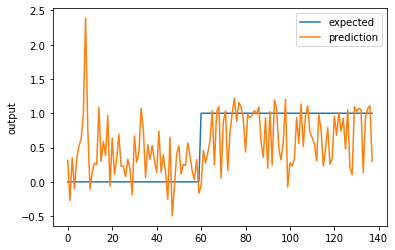

    a1        a2      s3 a4 a5  a6  a7     a8 a9 a10  a11 a12 a13    a14  \
83   a  0.580396   3.500  u  g   d   v  3.000  t   f    0   t   g  300.0   
86   b  0.533105   0.375  u  g   d   v  0.875  t   f    0   t   s  928.0   
92   b  0.538503   5.000  y  p  aa   v  8.500  t   f    0   f   g    0.0   
97   b  0.540729   0.500  u  g   c  bb  0.835  t   f    0   t   s  320.0   
254  b  0.075748   0.625  u  g   k   v  0.250  f   f    0   f   g  380.0   
286  a  0.274894   1.500  u  g  ff  ff  0.000  f   t    2   t   g  200.0   
329  b  1.029149   4.000  y  p   i   v  0.085  f   f    0   t   g  411.0   
445  a  0.373954  11.250  u  g  ff  ff  0.000  f   f    0   f   g    NaN   
450  b  1.040342   3.000  y  p   i  bb  7.000  f   f    0   f   g    0.0   
500  b -0.096261   4.000  u  g   x   v  5.000  t   t    3   t   g  290.0   
515  b  0.287158  10.500  u  g   x   v  6.500  t   f    0   f   g    0.0   
608  b  1.013835   0.040  y  p   d   v  4.250  f   f    0   t   g  460.0   

      a15 a

In [85]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from keras import metrics

def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.to_numpy().flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    pyplot.plot(t['y'].tolist(), label='expected')
    pyplot.plot(t['pred'].tolist(), label='prediction')
    pyplot.ylabel('output')
    pyplot.legend()
    pyplot.show()

def onehotcoding(data):
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_cols = pd.DataFrame(OH_encoder.fit_transform(data.values.reshape(-1,1)))
    
    return OH_cols

def labelencoding(data):
    encoder = LabelEncoder()
    encoded = pd.DataFrame(encoder.fit_transform(data.values.reshape(-1,1)))
    
    return encoded

def preprocess_data(df, target):
    if target:
        df = labelencoding(df)
        return df
    else:
        columns = [x for x in df.columns if str(df[x].dtypes) in ('object') and x != 'a13']
        for x in columns:
            df[x] = df[x].map({'t':1, 'f':0})
            
        oh_columns = onehotcoding(df['a13'])
        oh_columns.index = df.index

        df.drop(columns='a13', axis=1, inplace=True)
        df_concat = pd.concat([df, oh_columns], axis=1, ignore_index=True)
        df_concat.index = df.index

    return df_concat


def fill_missing_numeric(df,current,target):
    X = df.drop([target], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
    
    train_columns = ['s3','a8','a9','a10','a11','a12','a13','a15']
    
    X_train = preprocess_data(X_train[train_columns], False)
    X_test = preprocess_data(X_test[train_columns], False)
    y_train = preprocess_data(y_train, True)
    y_test = preprocess_data(y_test, True)

    merged_df = X_train.append(X_test).reset_index().set_index('index').sort_index()
    
    model = create_network(X_train, X_test, y_train, y_test)
    
    # Fill in as needed
    mask_nan = df.loc[pd.isna(df[current]), :].index
    predictions = model.predict(merged_df.iloc[mask_nan])
    df.loc[mask_nan, current] = predictions
    
    print(df.loc[mask_nan])


def create_network(X_train, X_test, y_train, y_test):
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[1], activation='relu')) # Hidden 1
    model.add(Dense(25, activation='relu')) # Hidden 2
    model.add(Dense(1)) # Output

    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=2,
                            mode='auto', restore_best_weights=True)
    
    model.fit(X_train,y_train,validation_data=(X_test,y_test),
              callbacks=[monitor],verbose=0,epochs=100)
    
    pred = model.predict(X_test)
    print(pred.shape)
    chart_regression(pred.flatten(), y_test)
    
    return model

df_submit = fill_missing_numeric(df,'a2','a16')
df_submit